--- Hasil Evaluasi Model  ---
R-squared (R2): 0.2239
Mean Absolute Error (MAE): 13228.09 ton/ha
Root Mean Squared Error (RMSE): 16376.16 ton/ha
-----------------------------------------


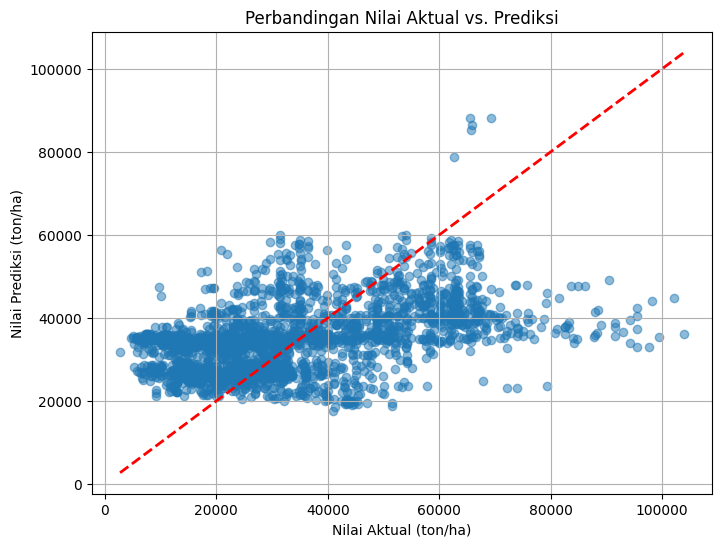

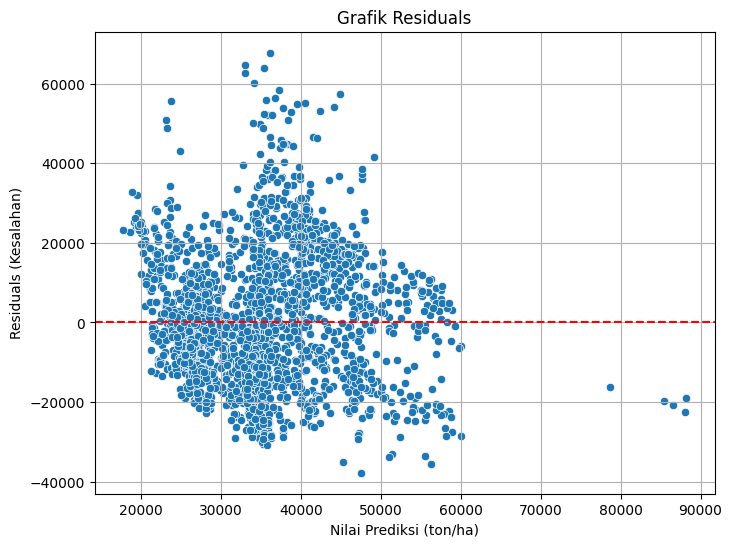

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# 1. Memuat Dataset
try:
    df = pd.read_csv('rice_paddy_crop_yield.csv')
except FileNotFoundError:
    print("Pastikan file 'rice_paddy_crop_yield.csv' sudah di-upload ke Colab.")

if 'df' not in locals() or df is None:
    print("Tidak dapat melanjutkan karena file dataset tidak ditemukan atau gagal dimuat.")
else:
    # 2. Pra-pemprosesan Data
    # Mengganti nama kolom agar lebih ringkas
    df_renamed = df.rename(columns={
        'Yield_Value': 'yield',
        'Pesticide_Value': 'pesticides',
        'Avg_Rainfall_mm': 'rainfall',
        'Avg_Temperature_celsius': 'temperature'
    })

    df_processed = df_renamed.drop(['Country', 'Crop_Item'], axis=1, errors='ignore')

    # Mengubah kolom menjadi numerik
    for col in df_processed.columns:
        if col != 'Year':
            df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')
    df_clean = df_processed.dropna()

    # 3. Mendefinisikan Fitur (X) dan Target (y)
    X = df_clean.drop(['yield', 'Year'], axis=1, errors='ignore')
    y = df_clean['yield']

    # 4. Membagi Data Latih dan Data Uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 5. Melatih Model Regresi Linier
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 6. Melakukan Prediksi pada Data Uji
    y_pred = model.predict(X_test)

    # 7. Melakukan Evaluasi Model
    r2 = metrics.r2_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

    # Menampilkan hasil evaluasi
    print("--- Hasil Evaluasi Model  ---")
    print(f"R-squared (R2): {r2:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f} ton/ha")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f} ton/ha")
    print("-----------------------------------------")


    # --- VISUALISASI HASIL EVALUASI ---

    # 1. Grafik Prediksi vs. Nilai Aktual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.xlabel("Nilai Aktual (ton/ha)")
    plt.ylabel("Nilai Prediksi (ton/ha)")
    plt.title("Perbandingan Nilai Aktual vs. Prediksi")
    plt.grid(True)
    plt.show()

    # 2. Grafik Residuals (Kesalahan Prediksi)
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Nilai Prediksi (ton/ha)")
    plt.ylabel("Residuals (Kesalahan)")
    plt.title("Grafik Residuals")
    plt.grid(True)
    plt.show()